In [1]:
from sklearn.cluster.bicluster import SpectralCoclustering
import numpy as np
import pandas as pd
from pandas import DataFrame

from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

from minisom import MiniSom

%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale

from bimax import BiMax

# np.set_printoptions(threshold = np.inf)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.bicluster module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
cd ml-100k/

C:\Users\User\RS\MovieLens\ml-100k


In [3]:
names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
# unique function check to check the unique numbers of user id and item id
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print (str(n_users) + ' users')
print (str(n_items) + ' items')

943 users
1682 items


In [62]:
ratingsNum = np.zeros((n_users, n_items))
ratings = np.zeros((n_users, n_items))
# threshold = 3
# df.intertuples will run the code directly
for row in df.itertuples():
     # user-items matrix begin from 0 to n-1
    ratingsNum[row[1]-1, row[2]-1] = 1
    ratings[row[1]-1, row[2]-1] = row[3]
    
    # for bimax
    # if row[3] > threshold:
        # ratingsNum[row[1]-1, row[2]-1] = 1
# print(ratingsNum)
# print(ratings)

# sum up the total number of movies for one user
itemRateNum = ratingsNum.sum(axis=1)
# sum up the total scores of movies for one user
itemRateSum = ratings.sum(axis=1)
# get average rating for one user with all the movies that he has seen
userRateAvg = itemRateSum/itemRateNum

# print (userRateAvg)
# print (itemRateNum)

In [63]:
data = pd.DataFrame(userRateAvg)
data['target'] = data.index+1

# recorder the target feature
target_feature = data["target"]
data = data.drop(columns=["target"])

print(data)

            0
0    3.610294
1    3.709677
2    2.796296
3    4.333333
4    2.874286
..        ...
938  4.265306
939  3.457944
940  4.045455
941  4.265823
942  3.410714

[943 rows x 1 columns]


In [64]:
print(target_feature)

0        1
1        2
2        3
3        4
4        5
      ... 
938    939
939    940
940    941
941    942
942    943
Name: target, Length: 943, dtype: int64


In [67]:


data = scale(data)
num = target_feature  # num[i] is the digit represented by data[i]

# x, y: the size of SOM.
# 64 features
# number of nodes in a superior neighborhood

som = MiniSom(13, 13, 1, sigma=1,
              learning_rate=0.5, neighborhood_function='triangle')

# Initializes the weights to span the first two principal components. This initialization doesn't depend on random processes and
# makes the training process converge faster. It is strongly reccomended to normalize the data before initializing
# the weights and use the same normalization for the training data.
# som.pca_weights_init(userRateAvg)

"""Trains the SOM.
        Parameters
        ----------
        data : np.array or list
            Data matrix.
        num_iteration : int
            Maximum number of iterations (one iteration per sample).
        random_order : bool (default=False)
            If True, samples are picked in random order.
            Otherwise the samples are picked sequentially.
        verbose : bool (default=False)
            If True the status of the training
            will be printed at each iteration.
"""
som.train(data, 5000, random_order=True, verbose=True)  # random training

 [ 2544 / 5000 ]  51% - 0:00:00 left 

 [ 4478 / 5000 ]  90% - 0:00:00 left 

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.05655256478190438


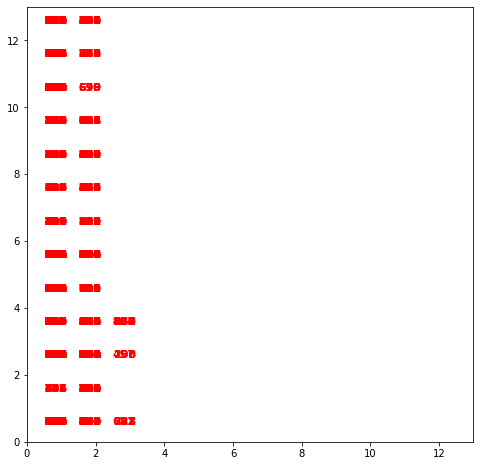

In [68]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    """Computes the coordinates of the winning neuron for the sample x."""
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
    """Returns the weights of the neural network."""
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
# plt.savefig('resulting_images/som_digts.png')
plt.show()

In [22]:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('u.item', sep='|', names=i_cols, encoding='latin-1')

items.head(10)

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## test minsom

In [70]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale

# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

# x, y: the size of SOM.
# 64 features
# number of nodes in a superior neighborhood

som = MiniSom(30, 30, 64, sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')

# Initializes the weights to span the first two principal components. This initialization doesn't depend on random processes and
# makes the training process converge faster. It is strongly reccomended to normalize the data before initializing
# the weights and use the same normalization for the training data.
som.pca_weights_init(data)
#print(type(data))

"""Trains the SOM.
        Parameters
        ----------
        data : np.array or list
            Data matrix.
        num_iteration : int
            Maximum number of iterations (one iteration per sample).
        random_order : bool (default=False)
            If True, samples are picked in random order.
            Otherwise the samples are picked sequentially.
        verbose : bool (default=False)
            If True the status of the training
            will be printed at each iteration.
"""
som.train(data, 5000, random_order=True, verbose=True)  # random training

 [  593 / 5000 ]  12% - 0:00:01 left 

 [ 1257 / 5000 ]  25% - 0:00:01 left 

 [ 1993 / 5000 ]  40% - 0:00:00 left 

 [ 2707 / 5000 ]  54% - 0:00:00 left 

 [ 3380 / 5000 ]  68% - 0:00:00 left 

 [ 4071 / 5000 ]  81% - 0:00:00 left 

 [ 4791 / 5000 ]  96% - 0:00:00 left 

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 3.0139187001252785


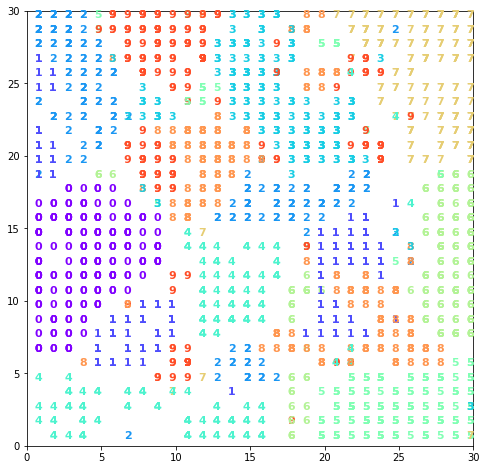

In [6]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    """Computes the coordinates of the winning neuron for the sample x."""
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
    """Returns the weights of the neural network."""
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
# plt.savefig('resulting_images/som_digts.png')
plt.show()

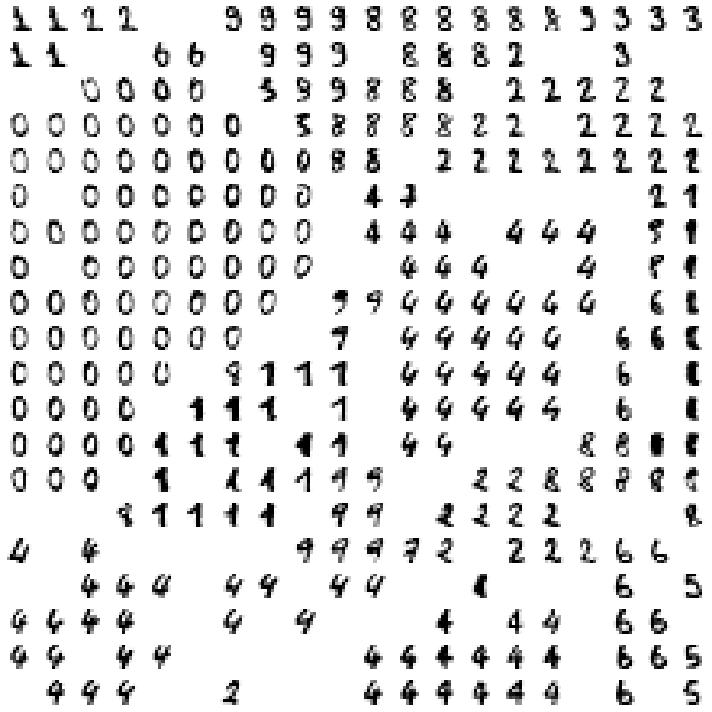

In [8]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
# plt.savefig('resulting_images/som_digts_imgs.png')
plt.show()

In [75]:
# save binary contents to a csv file
df = DataFrame(ratingsNum)
df.to_csv('binary_values.csv', index = False, header = False)

In [86]:
filename = "biclusters.csv"
cluster_no = 0
rows = []
columns = []
clusters_number = 1000

f = open(filename)


for i in range(0, clusters_number/2):
    f.readline().split()
    


        
f.close()

    
    
    
    



['1', '2', '13', '271', '286', '344', '416', '450', '537', '634', '655', '663', '936']
['1', '13', '25', '50', '100', '111', '127', '237', '258', '272']
['1', '2', '296', '463', '503', '537', '883']
['1', '10', '13', '14', '19', '50', '100', '127', '237', '269']
['1', '2', '286', '296', '305', '360', '416', '486', '592', '655', '883', '936']
['1', '13', '14', '50', '100', '127', '237', '251', '257', '269']
['1', '2', '6', '296', '463', '655', '854', '883', '936']
['1', '13', '14', '19', '50', '100', '127', '237', '257', '269']
['1', '2', '296', '327', '360', '416', '463', '486', '883']
['1', '10', '13', '14', '50', '100', '127', '237', '257', '269']
['1', '2', '296', '299', '360', '416', '486', '883']
['1', '10', '13', '14', '50', '100', '127', '237', '251', '257']
['1', '2', '63', '296', '360', '416', '486', '883']
['1', '10', '13', '14', '50', '100', '237', '251', '257', '269']
['1', '2', '296', '360', '416', '486', '883']
['1', '10', '13', '14', '50', '100', '127', '237', '251', '25

## example of bimax

In [16]:
generator = np.random.RandomState(1)
data = generator.binomial(1, 0.5, (20, 20))
model = BiMax()
model.fit(data)
print(data)

[[0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0]
 [1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1]
 [1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1]
 [0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1]
 [1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1]
 [0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1]
 [1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1]
 [0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0]
 [1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1]
 [1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0]
 [0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1]
 [0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1]
 [1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1]
 [1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0]
 [1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1]
 [0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1]
 [1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1]
 [0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0]
 [0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1]]


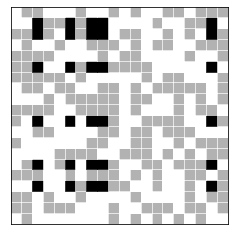

In [19]:
# get largest bicluster
idx = np.argmax(list(model.rows_[i].sum() * model.columns_[i].sum()
                     for i in range(len(model.rows_))))
bc = np.outer(model.rows_[idx], model.columns_[idx])

# plot data and overlay largest bicluster
plt.pcolor(data, cmap=plt.cm.Greys)
plt.pcolor(bc, cmap=plt.cm.Greys, alpha=0.7)
plt.axis('scaled')
plt.xticks([])
plt.yticks([])
plt.show()